## 비지도학습 (Unsupervised Learning)
- 차원축소
- 군집화(Clustering)

### 차원 축소
- PCA: 고차원에서 저차원으로 축소하는 선형 투영 기법

In [239]:
# 라이브러리 불러오기
import pandas as pd
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [240]:
# 데이터 샘플 확인
print(data.shape) # (178, 13) -> 178개의 데이터와 13개의 피처
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 스케일링

In [241]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [242]:
# df변수에 데이터 복사
# PCA 하면서 계속 데이터를 사용하기 때문에
df = data.copy()

### PCA

In [243]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2) # 2개로 차원 축소
# PCA 변환
df = pca.fit_transform(df)
df.shape # (178, 2)

(178, 2)

In [244]:
df[:3]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ]])

### PCA(2차원) 시각화

In [245]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
# 데이터 프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


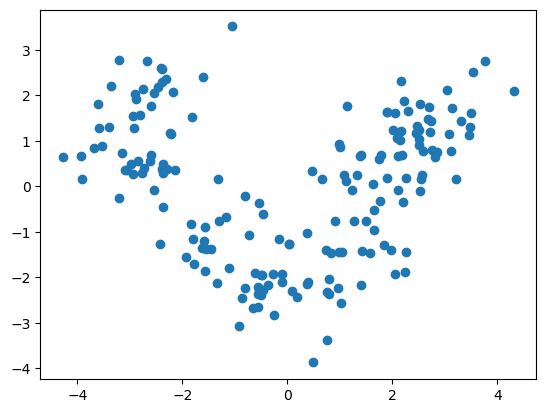

In [246]:
# scatter 이용하여 시각화 하기
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [247]:
# dataset.target

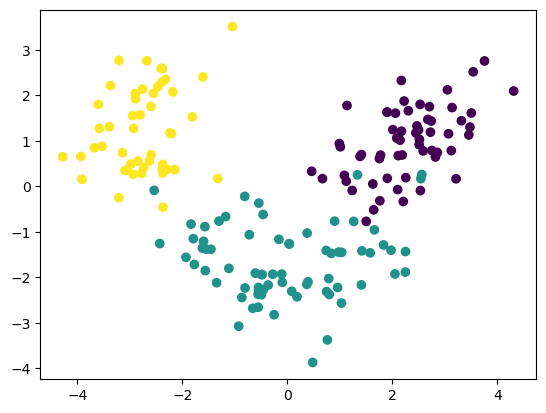

In [248]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [249]:
# 3개를 2개로 줄였을 때 설명력이 어떻게 되는지
print(pca.explained_variance_ratio_)
# 0 피처 설명력 0.36198848, 1피처 설명력 0.1920749


print(pca.explained_variance_ratio_.sum()) # 두 개의 피처를 합쳤을 때 0.5540633835693526 정도의 설명력을 가짐

[0.36198848 0.1920749 ]
0.5540633835693527


### 지도학습 (PCA 전후 비교) -> 랜덤포레스트

In [250]:
# PCA 후 데이터로 머신러닝 진행
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

0.9492063492063492

In [251]:
# PCA 전 데이터로 머신러닝 진행
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()

0.9553968253968254

PCA가 진행돼도 설명력을 갖추고 있다고 판단

### PCA(3차원) 시각화

In [252]:
df = data.copy()
pca = PCA(n_components=3)
pca.fit_transform(df)
df = pd.DataFrame(df)

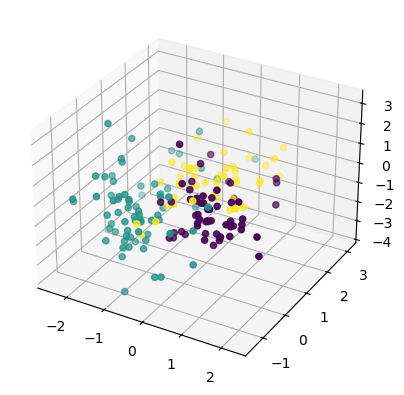

In [253]:
# 시각화 3차원
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=dataset.target)

### 기본적인 PCA외 다른 PCA 실습
### 점진적 PCA
- 데이터 셋이 큰 경우 사용(배치를 통해 점진적 수행)

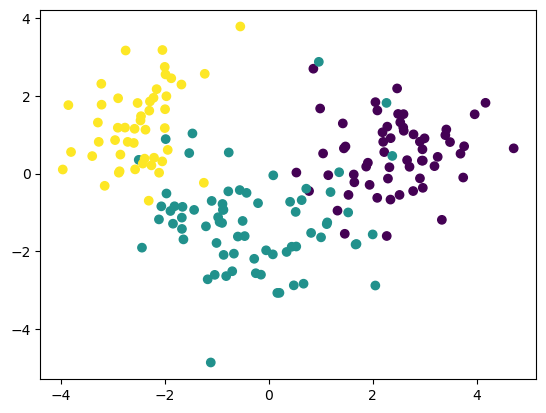

In [254]:
from sklearn.decomposition import IncrementalPCA
df = data.copy()
pca = IncrementalPCA(n_components=2, batch_size=16)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [255]:
# 데이터 설명
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.49241194001543886


### 희소 PCA
- 적절한 희소성을 유지(alpha값으로 조정)
- 오버피팅 방지

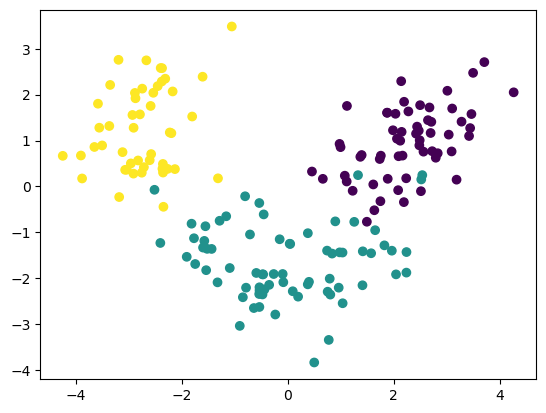

In [256]:
from sklearn.decomposition import SparsePCA
df = data.copy()
pca = SparsePCA(n_components=2, alpha=0.01)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

## 커널 PCA
- 비선형으로 차원 축소

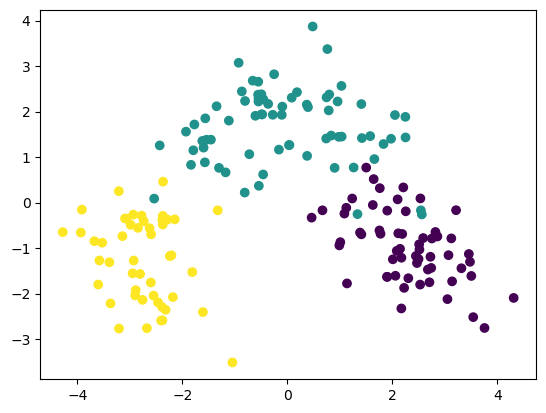

In [257]:
from sklearn.decomposition import KernelPCA
df = data.copy()
pca = KernelPCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

## SVD(Singular Value Decomposition) 특이값 분해
- 행렬을 특정한 구조로 분해하는 방식
- 신호 처리와 통계학 등의 분야에서 자주 사용됨

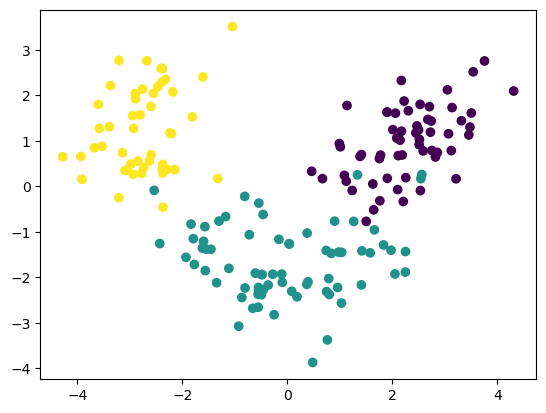

In [258]:
from sklearn.decomposition import TruncatedSVD
df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

## 군집화

### 비계층적 군집 분석
- 대표적인 방법 K-means
- K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
- n_clusters 하이퍼파라미터 반드시 설정

In [259]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [260]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df) # fit or fit_predict

C:\Users\juwonhee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [261]:
kmeans.predict(df)

array([0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1])

In [262]:
# 실제값과 예측값 비교
pred = kmeans.predict(df)
df['target'] = dataset.target
df['pred'] = pred
df
# ValueError: The feature names should match those that were passed during fit. Feature names unseen at fit time:- target
# 이전 셀 모두 실행 후 다시 실행하면 오류 사라짐

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0


target, pred 값은 군집 번호이기 때문에 서로 다를 수 있음 (매칭 시키면 안 됨)

### PCA -> 군집 -> 시각화

In [263]:
df = data.copy()

In [264]:
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [265]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

C:\Users\juwonhee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,0
176,93.456242,18.670819,0


In [266]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_
centers

array([[ -18.48419282,    4.20263004],
       [ 448.29677492,   -2.2569996 ],
       [-288.75258647,   -2.23889973]])

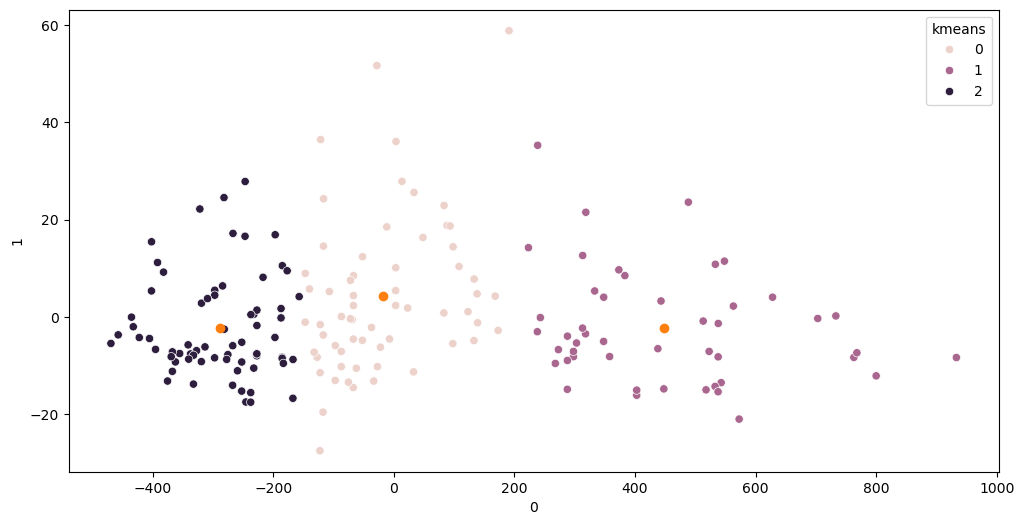

In [267]:
# 시각화
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1]) # 주황색 점이 중심점

#### cluster 개수 찾는 방법( 엘보우 방법, elbow method)

In [268]:
df.head()

,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0


C:\Users\juwonhee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\juwonhee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\juwonhee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\juwonhee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

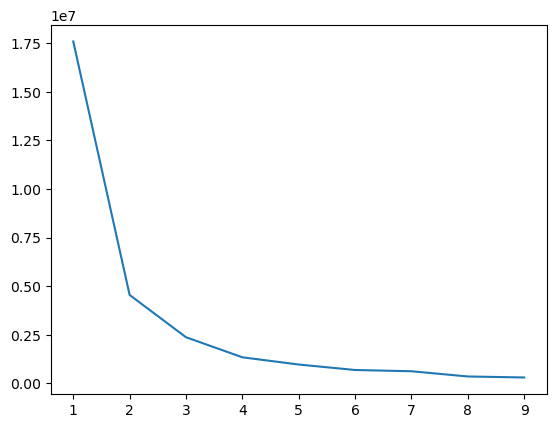

In [269]:
# 군집 수 찾기
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    df.columns = df.columns.astype(str) # df의 컬럼명을 모두 문자형으로 통
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia)

완만해 지는 숫자로 군집 수를 설정하면 된다.

### 계층적 군집 분석
- k-means와 달리 군집 개수를 사전에 설정하지 않음
- 덴드로그램

In [270]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [271]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [272]:
df

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


In [273]:
# 데이터 샘플링
kdata = df[:3].copy()
# pd.concat([kdata, df[70:73]])
# pd.concat([kdata, df[160:163]])
pd.concat([kdata, df[70:73]], ignore_index=True)
pd.concat([kdata, df[160:163]], ignore_index=True)
# kdata = kdata.append(df[70:73])
# kdata = kdata.append(df[160:163])

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,-227.068836,-7.618630
4,-66.755431,8.470290
5,-176.765098,9.473190


In [274]:
dataset.target[:3]

array([0, 0, 0])

In [275]:
dataset.target[70:73]

array([1, 1, 1])

In [276]:
dataset.target[160:163]

array([2, 2, 2])

### 덴드로그램

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 30.991512411471597, 30.991512411471597, 0.0],
  [0.0, 147.87787795984812, 147.87787795984812, 30.991512411471597]],
 'ivl': ['2', '0', '1'],
 'leaves': [2, 0, 1],
 'color_list': ['C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1']}

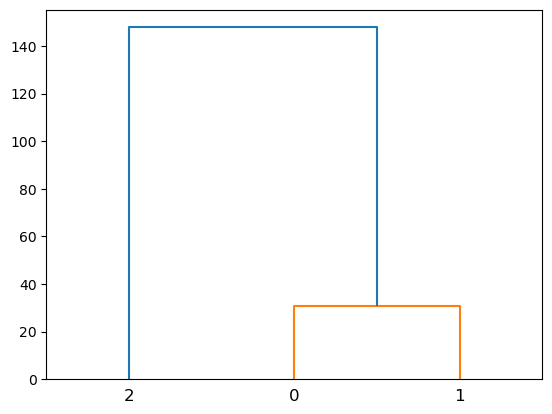

In [277]:
linkage = ward(kdata)
dendrogram(linkage)